# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [6]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [7]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,country_code,region,region_txt,arrivals,population,tourism_rank_2012,...,nkillus_total,nkillte_total,nwound_total,nwoundus_total,nwoundte_total,nvictim_total,nvictimus_total,nvictimte_total,incident_ct_total,incidents_per_capita
0,2012,5,Albania,NaN,ALB,NaN,NaN,3156000,2900401,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
1,2012,6,Algeria,Algeria,DZA,10.0,Middle East & North Africa,2634000,37383887,65,...,0.0,2.0,76.0,0.0,0.0,101.0,0.0,2.0,27,7.222363e-07
2,2012,7,Andorra,NaN,AND,NaN,NaN,2238000,82427,73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
3,2012,8,Angola,NaN,AGO,NaN,NaN,528000,25107931,113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,ATG,NaN,NaN,247000,90409,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00


# Exploratory plotting

Before I create the plot we mocked up, I want to get an idea for the distribution of incidents, populations, and incidents per capita for all countries and all years.

In [12]:
# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

In [13]:
# describe columns of interest
df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


All variables have 1078 values.

The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed. The non-zero numbers are very small, making them difficult to interpret and discuss. We may want to adjust the scale of our plot. Perhaps we could adjust population to be in the thousands, so that this number would have the unit of "incidents per 1000 people" rather than "incidents per capita".

In [47]:
def plot_histogram(column_name):
    plt.hist(df[column_name], bins=30, label=column_name)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.show()

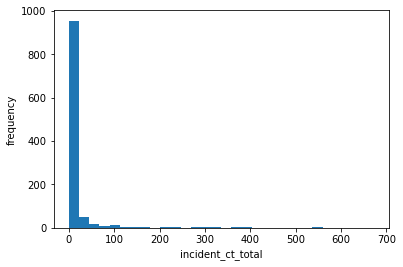

In [48]:
plot_histogram('incident_ct_total')

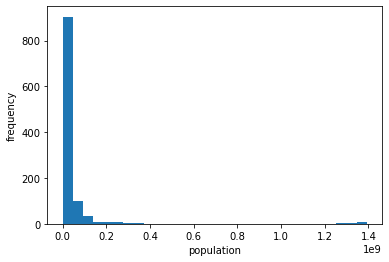

In [42]:
plot_histogram('population')

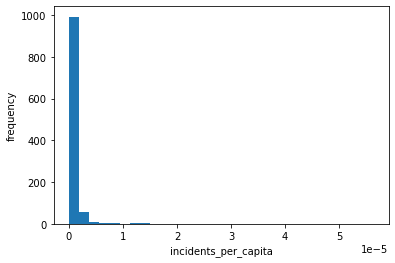

In [43]:
plot_histogram('incidents_per_capita')